In [119]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [122]:
%cd ..
from workflow.processing import *
from workflow.plotting import *

/home/vitchyr


In [151]:
import plotnine as gg

# experiment = Experiment(1, '/home/vitchyr/mnt2/log2/21-02-03-fetch-uvd--first-try/')
experiment = Experiment(1, '/home/vitchyr/mnt2/log2/21-02-04-icml2021--uvd-sweep-mujoco-ant/')
# experiment = Experiment(1, '/home/vitchyr/mnt2/log2/21-02-04-dev-paper-experiments-experiments-icml2021-sweep-mujoco-sawyer-push/')
df = experiment.record()
experiment

/global/scratch/vitchyr/doodad-log-since-2021-01-27/21-02-04-icml2021--uvd-sweep-mujoco-ant/1/47ea9ea4-6ffa-4d60-8559-b8b225b966f9


21-02-04-icml2021--uvd-sweep-mujoco-ant

In [152]:
df.columns

Index(['iteration', 'timestamp', 'return', 'env_steps', 'target_fraction',
       'target_q', 'td_loss', 'r_loss', 'mean_r', 'mean_r_with_goal',
       'max_r_with_goal', 'min_r_with_goal', 'actor_loss', 'valid_r_loss',
       'valid_target_r', 'valid_target_v', 'eval_final_success',
       'eval_success_rate', 'eval_distance_mean', 'eval_distance_final',
       'eval_distance_xy_mean', 'eval_distance_xy_final',
       'eval_distance_orientation_mean', 'eval_distance_orientation_final',
       'eval_distance_joint_mean', 'eval_distance_joint_final', 'action_norm',
       'minute'],
      dtype='object')

/home/vitchyr/anaconda2/envs/vis/lib/python3.6/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_point : Removed 59585 rows containing missing values.


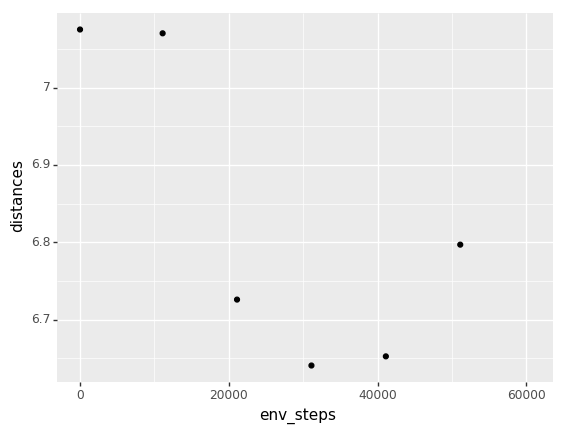

<ggplot: (8794259579761)>

In [161]:
df['distances'] = df['eval_distance_xy_mean']
p = (gg.ggplot(df)
     + gg.aes(x='env_steps', y='distances')
    + gg.geom_point()
)
p

In [147]:
print(df.shape)
df.tail()

(4684, 27)


,iteration,timestamp,return,env_steps,target_fraction,target_q,td_loss,r_loss,mean_r,mean_r_with_goal,...,eval_success_rate,eval_distance_mean,eval_distance_final,eval_distance_hand_mean,eval_distance_hand_final,eval_distance_puck_mean,eval_distance_puck_final,action_norm,minute,distances
4679,4679,1.612431e+09,NaN,5700.0,0.984375,1.066221,0.009547,-8.234489,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.202373,NaN
4680,4680,1.612431e+09,NaN,5700.0,0.976562,1.059791,0.011103,-8.225019,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.202731,NaN
4681,4681,1.612431e+09,NaN,5700.0,0.992188,1.080706,0.005903,-8.238245,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.203072,NaN
4682,4682,1.612431e+09,NaN,5700.0,0.976562,1.063230,0.017320,-8.230616,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.203433,NaN
4683,4683,1.612431e+09,NaN,5700.0,1.000000,1.041757,0.002387,-8.220737,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.203773,NaN


In [7]:
df['timestamp'].max() - df['timestamp'].min()

61573.33249425888

In [8]:
experiment.config()

batch_size                        512
burnin                          10000
critic_learning_rate           0.0008
density_learning_rate          0.0002
density_replay_size             50000
discount_factor                  0.98
env_name                 FetchPush-v1
exploration_noise                -2.3
min_replay_size                  1000
num_bijectors                       6
num_envs                            1
policy_learning_rate           0.0008
progressive_noise               False
replay_size                   1500000
reward_factor                    0.02
seed                        272706163
sequence_length                     4
shuffle_goals                   False
small_goal                      False
small_goal_size                 0.005
step_limit                          1
target_action_noise                 0
target_update_step               0.01
dtype: object

(0, 1)

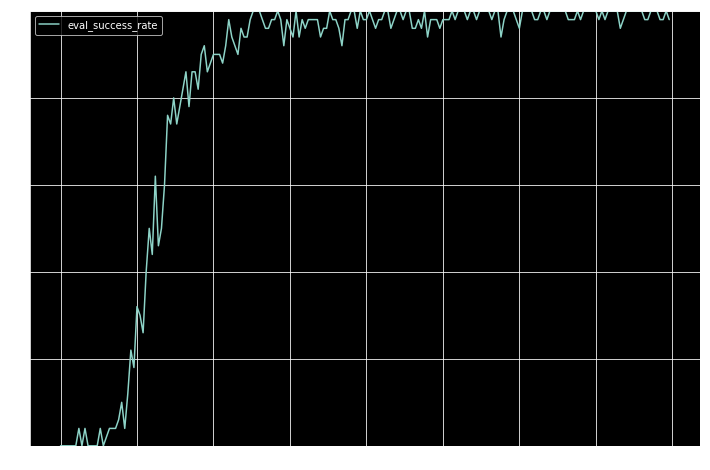

In [9]:
fig = plot_fields(df.dropna(subset=['eval_success_rate']).assign(eval_success_rate=lambda df: df['eval_success_rate']/50), ["eval_success_rate"], x='iteration', preprocessors=[subsample(1), smoothen_fields(1)])
plt.ylim((0, 1))

In [240]:
#df.to_csv("/home/anon/gdrive/GT (Research)/uvd_dfs_params_1/difficult_push_uvd1_3")

In [153]:
def compare_xids(xid1, xid2):
    directory = '/home/anon/sacred_partition/'
    config_1 = Experiment(xid1, directory).config()
    config_2 = Experiment(xid2, directory).config()

    return pd.DataFrame({xid1: config_1, xid2: config_2}).where(config_1 != config_2).dropna()
compare_xids(1, 2)

,1,2
seed,582913489,825864295


In [392]:
experiment.config()

batch_size                         512
burnin                           10000
critic_learning_rate             5e-05
density_learning_rate           0.0002
density_replay_size              50000
discount_factor                   0.98
env_name                 FetchSlide-v1
exploration_noise                 -2.3
min_replay_size                   1000
num_envs                             3
policy_learning_rate             5e-05
progressive_noise                 True
replay_size                    1500000
seed                          81316830
shuffle_goals                    False
small_goal                       False
step_limit                           1
target_action_noise                  0
target_update_step                0.01
dtype: object

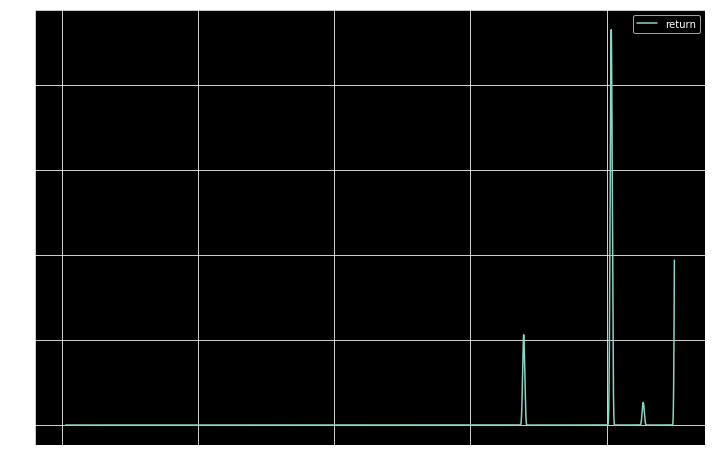

In [102]:
fig = plot_fields(df, ["return"], x='iteration', preprocessors=[subsample(1), smoothen_fields(1000)])

(0, 1)

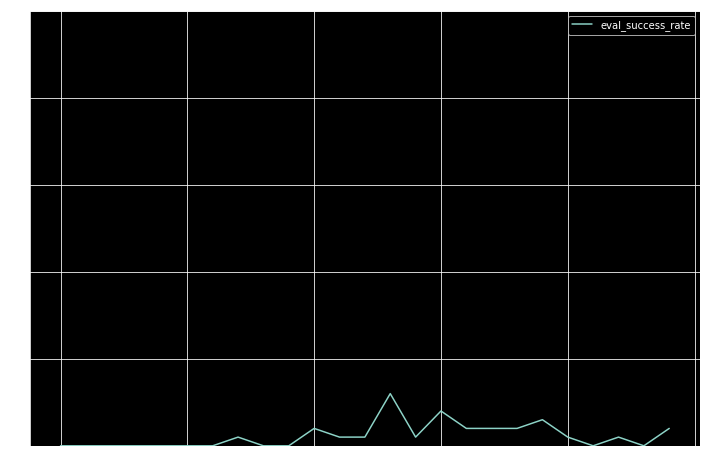

In [249]:
fig = plot_fields(df.dropna(subset=['eval_success_rate']).assign(eval_success_rate=lambda df: df['eval_success_rate']/50), ["eval_success_rate"], x='iteration', preprocessors=[subsample(1), smoothen_fields(1)])
plt.ylim((0, 1))

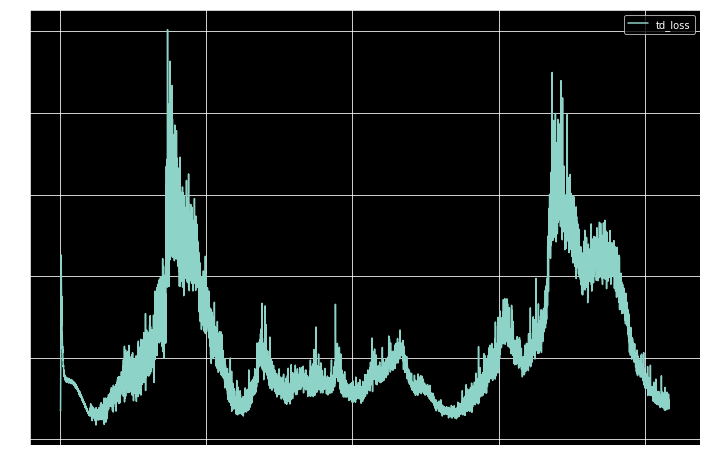

In [131]:
fig = plot_fields(df, ["td_loss"], x='iteration', preprocessors=[smoothen_fields(100)])